In [1]:
import pandas as pd
import numpy as np

In [15]:
district_data = pd.read_csv("../data/processed/districtAll.csv")
welcomeAnalysis = pd.read_csv("../data/processed/wellcomeAnalysis.csv")

In [16]:
cut_welcome = welcomeAnalysis[['latitude','longitude','num_bus_stops_within_1km','district']]

In [17]:
district_data.head()

,district,latitude,longitude,Total,Average household sie,Median income
0,Central and Western District,22.28219,114.14486,87700.0,2.6,42000.0
1,Eastern,22.27722,114.22519,188400.0,2.8,31500.0
2,Islands District,22.26382,113.96038,67400.0,2.7,28800.0
3,Kowloon City District,22.32866,114.19121,146500.0,2.7,29700.0
4,Kwai Tsing,22.35288,114.10004,176600.0,2.7,23300.0


In [18]:
merged = welcomeAnalysis.merge(district_data, how='left', on='district')

In [8]:
merged.head()

,name,formatted_address,place_id,rating,user_ratings_total,types,latitude_x,longitude_x,num_bus_stops_within_1km,num_mtr_station_within_1km,num_competitor_within_1km,district,latitude_y,longitude_y,Total,Average household sie,Median income
0,wellcome,"125, Metro Harbour View Plaza, 8 Fuk Lee St, T...",ChIJfzdi4rAABDQRYsiJViBAKIs,3.7,259,"['supermarket', 'grocery_or_supermarket', 'foo...",22.324410,114.160454,117,6,7,Sham Shui Po,22.32989,114.16250,164700.0,2.6,22000.0
1,Wellcome,"84-90號 Queen's Road Central, Central, Hong Kong",ChIJ5b0oWHsABDQRJUwc57avQ94,3.8,362,"['supermarket', 'grocery_or_supermarket', 'foo...",22.283245,114.155105,116,5,2,Central and Western District,22.28219,114.14486,87700.0,2.6,42000.0
2,Wellcome,"319 Nathan Rd, Jordan, Hong Kong",ChIJG3W4guwABDQRsYiKQEyeUvU,3.6,275,"['supermarket', 'grocery_or_supermarket', 'foo...",22.306436,114.171362,98,3,8,Yau Tsim Mong,22.32105,114.17261,123600.0,2.5,27900.0
3,Wellcome,"Shop No.23, G/F, Hoi Fu Shopping Centre, 2 Hoi...",ChIJvdn9MLkABDQRbEofjcY9gsc,3.6,215,"['supermarket', 'grocery_or_supermarket', 'foo...",22.315173,114.164415,94,5,8,Yau Tsim Mong,22.32105,114.17261,123600.0,2.5,27900.0
4,Wellcome,"G/F, TG Place, 8 Shing Yip St, Kwun Tong, Hong...",ChIJabudQ0UBBDQRF2ggpcEzLiE,3.5,182,"['supermarket', 'grocery_or_supermarket', 'foo...",22.310417,114.225745,78,3,1,Kwon Tong,22.31326,114.22581,247400.0,2.7,22200.0


In [21]:
district_shop = merged.groupby('district').count()[['latitude_x']]
district_shop.rename(columns={"latitude": "shop_count_in_district"},inplace=True)
# district_shop

In [22]:
merged1 = merged.merge(district_shop, how='left',on = 'district')

In [23]:
merged1.head()

,name,formatted_address,place_id,rating,user_ratings_total,types,latitude_x_x,longitude_x,num_bus_stops_within_1km,num_mtr_station_within_1km,num_competitor_within_1km,district,latitude_y,longitude_y,Total,Average household sie,Median income,latitude_x_y
0,wellcome,"125, Metro Harbour View Plaza, 8 Fuk Lee St, T...",ChIJfzdi4rAABDQRYsiJViBAKIs,3.7,259,"['supermarket', 'grocery_or_supermarket', 'foo...",22.324410,114.160454,117,6,7,Sham Shui Po,22.32989,114.16250,164700.0,2.6,22000.0,8
1,Wellcome,"84-90號 Queen's Road Central, Central, Hong Kong",ChIJ5b0oWHsABDQRJUwc57avQ94,3.8,362,"['supermarket', 'grocery_or_supermarket', 'foo...",22.283245,114.155105,116,5,2,Central and Western District,22.28219,114.14486,87700.0,2.6,42000.0,11
2,Wellcome,"319 Nathan Rd, Jordan, Hong Kong",ChIJG3W4guwABDQRsYiKQEyeUvU,3.6,275,"['supermarket', 'grocery_or_supermarket', 'foo...",22.306436,114.171362,98,3,8,Yau Tsim Mong,22.32105,114.17261,123600.0,2.5,27900.0,12
3,Wellcome,"Shop No.23, G/F, Hoi Fu Shopping Centre, 2 Hoi...",ChIJvdn9MLkABDQRbEofjcY9gsc,3.6,215,"['supermarket', 'grocery_or_supermarket', 'foo...",22.315173,114.164415,94,5,8,Yau Tsim Mong,22.32105,114.17261,123600.0,2.5,27900.0,12
4,Wellcome,"G/F, TG Place, 8 Shing Yip St, Kwun Tong, Hong...",ChIJabudQ0UBBDQRF2ggpcEzLiE,3.5,182,"['supermarket', 'grocery_or_supermarket', 'foo...",22.310417,114.225745,78,3,1,Kwon Tong,22.31326,114.22581,247400.0,2.7,22200.0,3


In [24]:
merged1['cust_num'] = merged1['Total'] / merged1['shop_count_in_district']
merged1['spend_per_cust'] = merged1['Median income'] * 0.05 * 12
merged1['sales_volume'] = merged1['spend_per_cust'] * merged1['cust_num']

KeyError: 'shop_count_in_district'

In [ ]:
import math
merged1['sales_volume'] = [math.log(x) for x in merged1['sales_volume']]

In [ ]:
merged1.head()

,name,formatted_address,place_id,rating,user_ratings_total,types,latitude,longitude,num_bus_stops_within_1km,num_mtr_station_within_1km,num_competitor_within_1km,district,Total,Median income,shop_count_in_district,cust_num,spend_per_cust,sales_volume
0,wellcome,"125, Metro Harbour View Plaza, 8 Fuk Lee St, T...",ChIJfzdi4rAABDQRYsiJViBAKIs,3.7,259,"['supermarket', 'grocery_or_supermarket', 'foo...",22.324410,114.160454,117,6,7,Sham Shui Po,164700.0,22000.0,8,20587.500000,13200.0,19.420411
1,Wellcome,"84-90號 Queen's Road Central, Central, Hong Kong",ChIJ5b0oWHsABDQRJUwc57avQ94,3.8,362,"['supermarket', 'grocery_or_supermarket', 'foo...",22.283245,114.155105,116,5,2,Central and Western District,87700.0,42000.0,11,7972.727273,25200.0,19.118381
2,Wellcome,"319 Nathan Rd, Jordan, Hong Kong",ChIJG3W4guwABDQRsYiKQEyeUvU,3.6,275,"['supermarket', 'grocery_or_supermarket', 'foo...",22.306436,114.171362,98,3,8,Yau Tsim Mong,123600.0,27900.0,12,10300.000000,16740.0,18.965456
3,Wellcome,"Shop No.23, G/F, Hoi Fu Shopping Centre, 2 Hoi...",ChIJvdn9MLkABDQRbEofjcY9gsc,3.6,215,"['supermarket', 'grocery_or_supermarket', 'foo...",22.315173,114.164415,94,5,8,Yau Tsim Mong,123600.0,27900.0,12,10300.000000,16740.0,18.965456
4,Wellcome,"G/F, TG Place, 8 Shing Yip St, Kwun Tong, Hong...",ChIJabudQ0UBBDQRF2ggpcEzLiE,3.5,182,"['supermarket', 'grocery_or_supermarket', 'foo...",22.310417,114.225745,78,3,1,Kwon Tong,247400.0,22200.0,3,82466.666667,13320.0,20.817171


(array([31.,  8.,  0.,  7.,  0.,  8.,  4.,  1.,  1.,  2.]),
 array([18.96545552, 19.27479296, 19.5841304 , 19.89346783, 20.20280527,
        20.51214271, 20.82148015, 21.13081759, 21.44015503, 21.74949246,
        22.0588299 ]),
 <BarContainer object of 10 artists>)

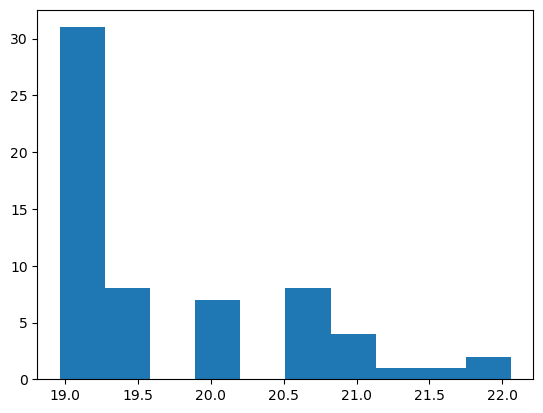

In [ ]:
import matplotlib.pyplot as plt
plt.hist(merged1['sales_volume'])

In [ ]:
# import statsmodels.api as sm

# y = merged1['sales_volume']
# x = merged1[['num_bus_stops_within_1km','Total household in district','Median income']]

# model = sm.OLS(y,x).fit()
# print(model.summary())

In [ ]:
import statsmodels.api as sm

y = merged1['sales_volume']
x = merged1[['num_bus_stops_within_1km','num_mtr_station_within_1km','num_competitor_within_1km']]

model = sm.OLS(y,x).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:           sales_volume   R-squared (uncentered):                   0.855
Model:                            OLS   Adj. R-squared (uncentered):              0.847
Method:                 Least Squares   F-statistic:                              115.5
Date:                Sun, 19 Feb 2023   Prob (F-statistic):                    1.15e-24
Time:                        13:28:21   Log-Likelihood:                         -213.15
No. Observations:                  62   AIC:                                      432.3
Df Residuals:                      59   BIC:                                      438.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [ ]:
merged1.to_csv('merged1.csv')

# adress_optimization

In [ ]:
zoneAnalysis = pd.read_csv("data/processed1/zoneAnalysis.csv")
zoneAnalysis.head()

,name,lat1,lat2,lon1,lon2,Number_of_shop,ratingMean,Number_of_rating_Mean,Number_of_busStop,Number_of_Mtr,Number_of_competitor,district
0,001-001,22.188762,22.212864,113.839997,113.871762,0,NaN,NaN,0,0,0,NaN
1,001-002,22.188762,22.212864,113.871762,113.903527,0,NaN,NaN,0,0,0,NaN
2,001-003,22.188762,22.212864,113.903527,113.935292,0,NaN,NaN,0,0,0,NaN
3,001-004,22.188762,22.212864,113.935292,113.967057,0,NaN,NaN,0,0,0,NaN
4,001-005,22.188762,22.212864,113.967057,113.998822,0,NaN,NaN,0,0,0,NaN


In [ ]:
x_new = zoneAnalysis[['Number_of_busStop','Number_of_Mtr','Number_of_competitor']]
predict = model.predict(x_new)
zoneAnalysis['predicted_sales'] = predict

In [ ]:
x1 = 1
zoneAnalysis['has_shop'] = [1 if i>0 else 0 for i in zoneAnalysis['Number_of_shop']]
zoneAnalysis['rent'] = zoneAnalysis['predicted_sales'] * 0.08 
zoneAnalysis['disposal'] = [math.log(300000) for i in zoneAnalysis['rent']] * zoneAnalysis['has_shop']
zoneAnalysis['cost_per_grid'] = (zoneAnalysis['disposal'] - zoneAnalysis['rent']) * x1

In [ ]:
zoneAnalysis.head()

,name,lat1,lat2,lon1,lon2,Number_of_shop,ratingMean,Number_of_rating_Mean,Number_of_busStop,Number_of_Mtr,Number_of_competitor,district,predicted_sales,has_shop,rent,disposal,cost_per_grid
0,001-001,22.188762,22.212864,113.839997,113.871762,0,NaN,NaN,0,0,0,NaN,0.0,0,0.0,0.0,0.0
1,001-002,22.188762,22.212864,113.871762,113.903527,0,NaN,NaN,0,0,0,NaN,0.0,0,0.0,0.0,0.0
2,001-003,22.188762,22.212864,113.903527,113.935292,0,NaN,NaN,0,0,0,NaN,0.0,0,0.0,0.0,0.0
3,001-004,22.188762,22.212864,113.935292,113.967057,0,NaN,NaN,0,0,0,NaN,0.0,0,0.0,0.0,0.0
4,001-005,22.188762,22.212864,113.967057,113.998822,0,NaN,NaN,0,0,0,NaN,0.0,0,0.0,0.0,0.0


In [ ]:
zoneAnalysis.to_csv('zoneAnalysis1111.csv')

In [ ]:
total_sales = zoneAnalysis['predicted_sales'].sum()
total_cost = zoneAnalysis['cost_per_grid'].sum()
#total_revenue = 

In [ ]:
total_cost

190.4090106177047

In [ ]:
from pulp import *

# Create a maximization problem
problem = LpProblem("example_mip", LpMaximize)

# Define variables
x = LpVariable('x', lowBound=0, cat='Integer')
y = LpVariable('y', lowBound=0, cat='Integer')

# Define objective function
problem += 2*x + 3*y

# Define constraints
problem += 4*x + 3*y <= 25
problem += x + y <= 8

# Print problem statement
print(problem)

# Solve the problem
status = problem.solve()

# Print the solution
print("Status:", LpStatus[status])
print("Optimal Solution:")
print("x =", value(x))
print("y =", value(y))
print("Objective Value =", value(problem.objective))

ModuleNotFoundError: No module named 'pulp'